In [9]:
#import packages & libraries
from prophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [10]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.fromtimestamp(d) for d in df.time]
    return df

In [11]:
df = daily_price_historical('BTC','USD')

df.head(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
0,1279324800,0.04951,0.04951,0.04951,20.00,0.9902,0.04951,direct,,2010-07-17
1,1279411200,0.08585,0.05941,0.04951,75.01,5.0920,0.08584,direct,,2010-07-18
2,1279497600,0.09307,0.07723,0.08584,574.00,49.6600,0.08080,direct,,2010-07-19
3,1279584000,0.08181,0.07426,0.08080,262.00,20.5900,0.07474,direct,,2010-07-20
4,1279670400,0.07921,0.06634,0.07474,575.00,42.2600,0.07921,direct,,2010-07-21
5,1279756800,0.08181,0.05050,0.07921,2160.00,129.7800,0.05050,direct,,2010-07-22
6,1279843200,0.06767,0.05050,0.05050,2402.50,141.0700,0.06262,direct,,2010-07-23
7,1279929600,0.06161,0.05049,0.06262,496.32,26.7300,0.05454,direct,,2010-07-24
8,1280016000,0.05941,0.05050,0.05454,1551.48,85.0600,0.05050,direct,,2010-07-25
9,1280102400,0.05600,0.05000,0.05050,877.00,46.9100,0.05600,direct,,2010-07-26


In [12]:
df.tail(10)

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,timestamp
4607,1677369600,23673.78,23068.21,23167.45,27038.81,6.314675e+08,23557.39,direct,,2023-02-26
4608,1677456000,23876.65,23144.28,23557.39,44498.06,1.044207e+09,23490.07,direct,,2023-02-27
4609,1677542400,23596.23,23039.39,23490.07,34848.42,8.140387e+08,23134.20,direct,,2023-02-28
4610,1677628800,23962.77,23037.24,23134.20,45286.75,1.069269e+09,23641.20,direct,,2023-03-01
4611,1677715200,23788.72,23212.33,23641.20,34699.93,8.128111e+08,23467.22,direct,,2023-03-02
4612,1677801600,23476.96,22147.42,23467.22,59219.77,1.327278e+09,22361.45,direct,,2023-03-03
4613,1677888000,22410.72,22179.49,22361.45,11820.44,2.639006e+08,22351.08,direct,,2023-03-04
4614,1677974400,22632.51,22240.41,22351.08,20845.84,4.677936e+08,22433.65,direct,,2023-03-05
4615,1678060800,22596.13,22304.69,22433.65,27062.82,6.069781e+08,22410.34,direct,,2023-03-06
4616,1678147200,22540.33,22358.89,22410.34,6071.59,1.362755e+08,22400.56,direct,,2023-03-07


In [13]:
limit = datetime(2020,12,31)
start = datetime(2015,1,1)
df_train = df[(df['timestamp'] <= limit )]
df_train = df_train[(df_train['timestamp'] >= start)]

days = [val for val in df_train['timestamp'] ]
prices = [val for val in df_train['close'] ]
dict = {'Date': days, 'Close': prices}

In [14]:
df_train = pd.DataFrame(dict) 
filename = 'train_prices.csv'
df_train.to_csv(filename, index=False) 

print(f"{filename} created successfully.")

train_prices.csv created successfully.


In [15]:
#rename columns
prophet_df = df_train.rename(columns={'Date':'ds',
                                'Close':'y'})

#check
prophet_df.columns

Index(['ds', 'y'], dtype='object')

In [16]:
#initialize
model = Prophet()

#fit
model.fit(prophet_df)

10:42:32 - cmdstanpy - INFO - Chain [1] start processing
10:42:33 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
#forecast for the next 30 days
future = model.make_future_dataframe(periods=365)

#predict
forecast = model.predict(future)
     

#check out forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,543.594655,315.426226,4268.074468,543.594655,543.594655,1771.238605,1771.238605,1771.238605,1.134549,1.134549,1.134549,1770.104056,1770.104056,1770.104056,0.0,0.0,0.0,2314.833260
1,2015-01-02,543.010674,284.801918,4174.052636,543.010674,543.010674,1633.958546,1633.958546,1633.958546,-22.012985,-22.012985,-22.012985,1655.971530,1655.971530,1655.971530,0.0,0.0,0.0,2176.969220
2,2015-01-03,542.426693,145.693473,4121.470060,542.426693,542.426693,1539.437283,1539.437283,1539.437283,0.664445,0.664445,0.664445,1538.772838,1538.772838,1538.772838,0.0,0.0,0.0,2081.863976
3,2015-01-04,541.842712,-100.628978,3933.934192,541.842712,541.842712,1405.094849,1405.094849,1405.094849,-14.699429,-14.699429,-14.699429,1419.794278,1419.794278,1419.794278,0.0,0.0,0.0,1946.937562
4,2015-01-05,541.258731,-217.810997,3744.340830,541.258731,541.258731,1312.651544,1312.651544,1312.651544,12.370430,12.370430,12.370430,1300.281114,1300.281114,1300.281114,0.0,0.0,0.0,1853.910275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,20835.533141,15612.770975,30918.135476,13679.171163,28299.144739,2243.233204,2243.233204,2243.233204,12.370430,12.370430,12.370430,2230.862774,2230.862774,2230.862774,0.0,0.0,0.0,23078.766345
2553,2021-12-28,20852.801472,15681.018462,30834.284593,13669.940419,28356.106517,2152.484665,2152.484665,2152.484665,3.779720,3.779720,3.779720,2148.704945,2148.704945,2148.704945,0.0,0.0,0.0,23005.286137
2554,2021-12-29,20870.069803,15564.377269,30769.216838,13664.923796,28398.103279,2076.309349,2076.309349,2076.309349,18.763269,18.763269,18.763269,2057.546080,2057.546080,2057.546080,0.0,0.0,0.0,22946.379151
2555,2021-12-30,20887.338133,15684.076776,30266.175030,13649.614002,28440.100040,1959.672313,1959.672313,1959.672313,1.134549,1.134549,1.134549,1958.537764,1958.537764,1958.537764,0.0,0.0,0.0,22847.010446


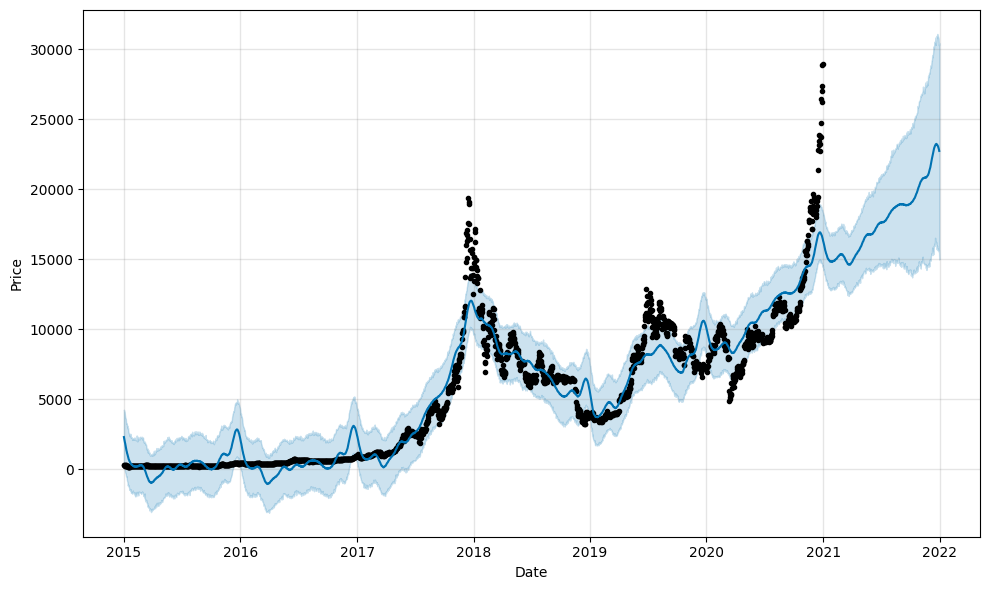

In [18]:
#visualize with Facebook internal tool
figure_1 = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

In [19]:
data = prophet_df[['ds','y']]
print(data)
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

             ds         y
0    2015-01-01    314.89
1    2015-01-02    315.21
2    2015-01-03    287.13
3    2015-01-04    264.72
4    2015-01-05    274.84
...         ...       ...
2187 2020-12-27  26249.27
2188 2020-12-28  27039.45
2189 2020-12-29  27360.78
2190 2020-12-30  28889.61
2191 2020-12-31  28972.40

[2192 rows x 2 columns]


,ds,y
0,2015-01-01,314.89
1,2015-01-02,315.21
2,2015-01-03,287.13
3,2015-01-04,264.72
4,2015-01-05,274.84


In [20]:
from neuralprophet import NeuralProphet

m = NeuralProphet()
neural_model = m.fit(data, freq='D', epochs=200)
future = m.make_future_dataframe(data, periods=365)
forecast = m.predict(future)
forecast.head()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (69) is too small than the required number for the learning rate finder (234). The results might not be optimal.


Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.954% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 69it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2021-01-01,None,14833.676758,13284.310547,1576.716431,-27.349846
1,2021-01-02,None,14755.453125,13294.895508,1472.958130,-12.399926
2,2021-01-03,None,14655.434570,13305.483398,1365.240479,-15.288910
3,2021-01-04,None,14584.324219,13316.071289,1254.120361,14.132007
4,2021-01-05,None,14467.072266,13326.656250,1140.180176,0.236573


In [23]:
forecast.tail(10)

,ds,y,yhat1,trend,season_yearly,season_weekly
355,2021-12-22,None,19377.966797,17042.658203,2308.821777,26.486267
356,2021-12-23,None,19336.388672,17053.246094,2268.958496,14.183837
357,2021-12-24,None,19258.197266,17063.833984,2221.714111,-27.349846
358,2021-12-25,None,19229.216797,17074.419922,2167.198242,-12.399926
359,2021-12-26,None,19175.289062,17085.005859,2105.572998,-15.288910
360,2021-12-27,None,19146.779297,17095.595703,2037.052246,14.132007
361,2021-12-28,None,19068.318359,17106.179688,1961.901489,0.236573
362,2021-12-29,None,19023.689453,17116.767578,1880.434937,26.486267
363,2021-12-30,None,18934.552734,17127.355469,1793.013672,14.183837
364,2021-12-31,None,18810.636719,17137.941406,1700.044434,-27.349846


In [27]:
limit = datetime(2021,12,31)
start = datetime(2021,1,1)
df_real = df[(df['timestamp'] <= limit )]
df_real = df_real[(df_real['timestamp'] >= start)]

print(df_real)

            time      high       low      open  volumefrom      volumeto  \
3821  1609459200  29666.33  28748.21  28972.40    50841.73  1.487306e+09   
3822  1609545600  33257.29  29036.26  29388.94   119214.75  3.750441e+09   
3823  1609632000  34789.34  32010.59  32203.64    93510.99  3.132759e+09   
3824  1609718400  33622.70  28493.29  33063.48   124909.68  3.901979e+09   
3825  1609804800  34487.44  29985.29  32030.55    93735.47  3.037657e+09   
...          ...       ...       ...       ...         ...           ...   
4181  1640563200  52079.46  50481.26  50790.88    21873.37  1.120188e+09   
4182  1640649600  50718.53  47317.78  50714.73    40699.40  1.985905e+09   
4183  1640736000  48145.34  46107.79  47536.39    33749.80  1.599557e+09   
4184  1640822400  47917.89  45964.28  46471.70    39311.18  1.852207e+09   
4185  1640908800  48573.22  45665.44  47129.66    34737.79  1.636014e+09   

         close conversionType conversionSymbol  timestamp  
3821  29388.94         dire

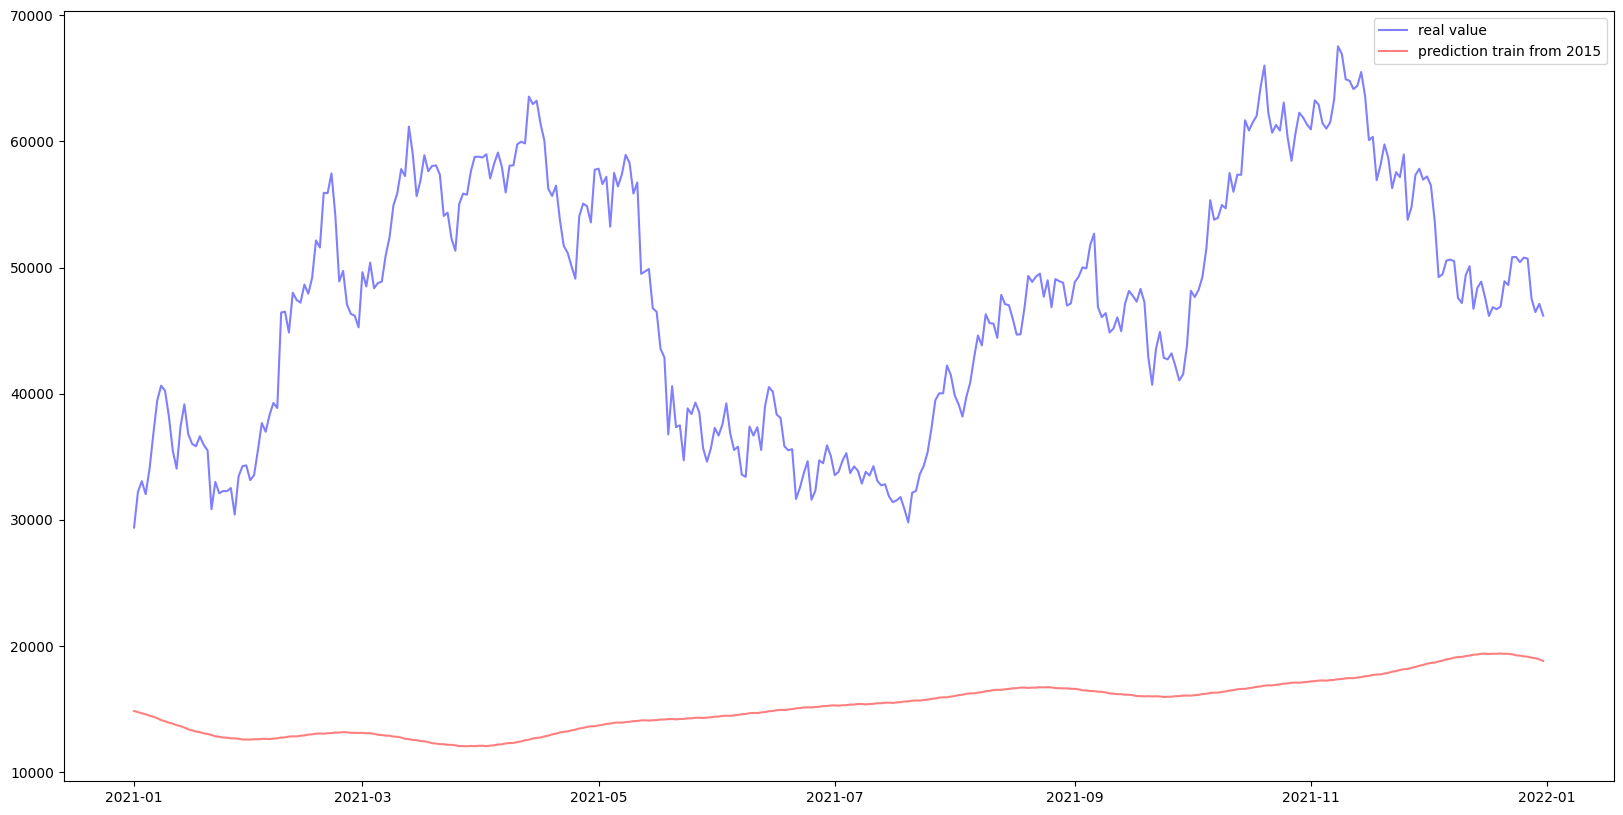

In [28]:
plt.figure(figsize=(20,10))
plt.plot(df_real['timestamp'], df_real['close'],color='blue',alpha=0.5, label="real value")
plt.plot(forecast['ds'], forecast['yhat1'],color='red',alpha=0.5, label="prediction train from 2015")
plt.legend()
plt.show()